In [1]:
pip install wooldridge

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 37.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import wooldridge as wd
import seaborn as sns

# Caso de estudio


La data MROZ es un conjunto de datos que forma parte del paquete wooldridge en R y Python, el cual contiene información sobre mujeres casadas y sus características laborales y familiares. Este conjunto de datos es comúnmente utilizado en análisis econométricos.

Descripción General:
- Número de Observaciones: 753
- Número de Variables: 22
- Fuente Original: Investigación sobre el mercado laboral de mujeres casadas.

Variables Principales:
- inlf (Participación Laboral): Variable binaria que indica si la mujer participa en la fuerza laboral (1) o no (0).

- hours (Horas Trabajadas): Número de horas trabajadas por año.

- nwifeinc (Ingreso No Laboral del Esposo): Ingreso no laboral del esposo.

- educ (Años de Educación): Años de educación de la mujer.

- exper (Experiencia Laboral): Años de experiencia laboral.

- expersq (Experiencia Laboral al Cuadrado): Experiencia laboral al cuadrado.

- age (Edad): Edad de la mujer.

- kidslt6 (Número de Hijos Menores de 6 Años): Número de hijos menores de 6 años.

- kidsge6 (Número de Hijos de 6 a 18 Años): Número de hijos de 6 a 18 años.

- mtr (Tasa Marginal de Impuestos sobre los Ingresos): Tasa marginal de impuestos.

- motheduc (Años de Educación de la Madre): Años de educación de la madre.

- fatheduc (Años de Educación del Padre): Años de educación del padre.

- unem (Tasa de Desempleo): Tasa de desempleo en la región.

- city (Indicador de Residencia en la Ciudad): Variable binaria que indica si la mujer vive en la ciudad (1) o no (0).

- nwifeinc (Ingreso No Laboral de la Esposa): Ingreso no laboral de la esposa.

- lwage (Logaritmo del Salario): Logaritmo del salario.

- expersq (Experiencia Laboral al Cuadrado): Experiencia laboral al cuadrado.

In [ ]:
mroz_data = wd.data('mroz')
mroz_data.drop(['repwage','lwage'], axis=1,inplace=True)
mroz_data.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,hushrs,husage,huseduc,huswage,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,expersq
0,1,1610,1,0,32,12,3.3540,2708,34,12,4.0288,16310.0,0.7215,12,7,5.0,0,14,10.910060,196
1,1,1656,0,2,30,12,1.3889,2310,30,9,8.4416,21800.0,0.6615,7,7,11.0,1,5,19.499981,25
2,1,1980,1,3,35,12,4.5455,3072,40,12,3.5807,21040.0,0.6915,12,7,5.0,0,15,12.039910,225
3,1,456,0,3,34,12,1.0965,1920,53,10,3.5417,7300.0,0.7815,7,7,5.0,0,6,6.799996,36
4,1,1568,1,2,31,14,4.5918,2000,32,12,10.0000,27300.0,0.6215,12,14,9.5,1,7,20.100058,49


## Pregunta 1

Genera un modelo predictivo que tenga a wage como objetivo y mide su precision

Mean Squared Error (MSE): 2.309970247136361
R-squared (R2): 0.5884567190502548


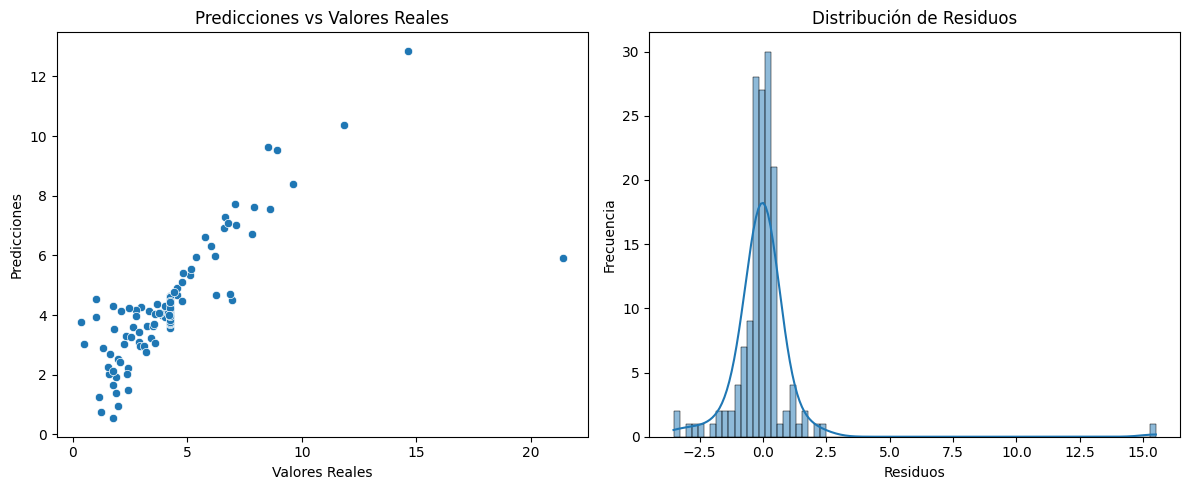

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import wooldridge as wd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
mroz_data = wd.data('mroz')

# Eliminar columnas innecesarias
mroz_data.drop(['repwage', 'lwage'], axis=1, inplace=True)

# Seleccionar las variables predictoras (X) y la variable objetivo (y)
X = mroz_data.drop('wage', axis=1)
y = mroz_data['wage']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reemplazar los valores NaN en y_train con la media de los valores existentes
y_train.fillna(y_train.mean(), inplace=True)

# Reemplazar los valores NaN en y_test con la media de los valores existentes
y_test.fillna(y_test.mean(), inplace=True)

# Normalizar los datos (opcional, pero puede mejorar el rendimiento del modelo)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Medir la precisión del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Gráficos
plt.figure(figsize=(12, 5))

# Gráfico de dispersión para las predicciones vs valores reales
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')

# Gráfico de distribución de residuos
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuos')

plt.tight_layout()
plt.show()


## Pregunta 2
Genera un modelo predictivo que tenga a wage como inlf y mide su precision

Accuracy: 0.7152317880794702
Confusion Matrix:
[[41 25]
 [18 67]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.62      0.66        66
           1       0.73      0.79      0.76        85

    accuracy                           0.72       151
   macro avg       0.71      0.70      0.71       151
weighted avg       0.71      0.72      0.71       151



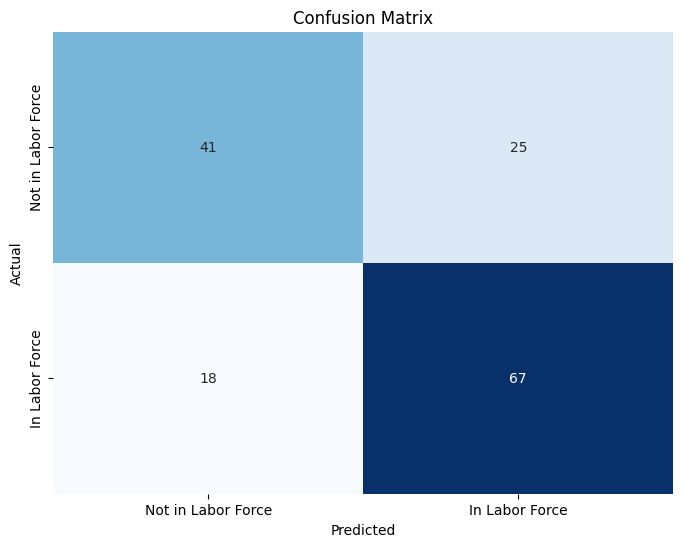

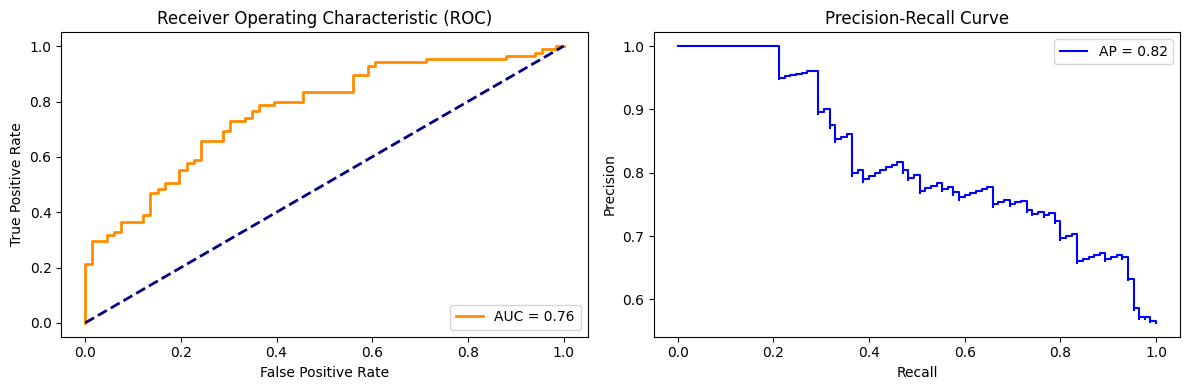

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import wooldridge as wd

# Cargar los datos
mroz_data = wd.data('mroz')

# Eliminar columnas innecesarias
mroz_data.drop(['repwage', 'lwage'], axis=1, inplace=True)

# Seleccionar las variables predictoras (X) y la variable objetivo (y)
X = mroz_data[['wage', 'kidslt6', 'kidsge6', 'age', 'educ', 'hushrs', 'huseduc', 'huswage', 'faminc']]
y = mroz_data['inlf']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos (opcional, pero puede mejorar el rendimiento del modelo)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Manejar los valores NaN con SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Crear un modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Medir la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Mostrar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not in Labor Force', 'In Labor Force'],
            yticklabels=['Not in Labor Force', 'In Labor Force'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calcular la probabilidad de pertenencia a la clase positiva
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calcular la curva precision-recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Mostrar las curvas ROC y precision-recall
plt.figure(figsize=(12, 4))

# Curva ROC
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# Curva precision-recall
plt.subplot(1, 2, 2)
plt.step(recall, precision, color='b', where='post', label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
